In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv("/Users/tuhinalambijoy/Downloads/synthetic_credit_dataset_1000.csv")
data

,Respondent ID,Age,Annual Income,Financial Responsibility,On-Time Payment,Credit Utilization,Credit Score
0,R1,56,780.24,6.0,68.11,50.16,646
1,R2,46,1657.77,2.0,86.29,NaN,921
2,R3,32,658.35,7.0,94.72,68.35,656
3,R4,60,1426.70,3.0,NaN,37.54,850
4,R5,25,1568.41,3.0,NaN,NaN,874
...,...,...,...,...,...,...,...
995,R996,22,978.50,6.0,95.78,33.06,789
996,R997,40,761.27,1.0,80.82,74.47,580
997,R998,27,1111.06,8.0,62.31,41.24,773
998,R999,61,991.12,7.0,84.53,19.58,816


In [4]:
data.head()

,Respondent ID,Age,Annual Income,Financial Responsibility,On-Time Payment,Credit Utilization,Credit Score
0,R1,56,780.24,6.0,68.11,50.16,646
1,R2,46,1657.77,2.0,86.29,NaN,921
2,R3,32,658.35,7.0,94.72,68.35,656
3,R4,60,1426.70,3.0,NaN,37.54,850
4,R5,25,1568.41,3.0,NaN,NaN,874


In [5]:
raw_data=data.copy()

In [6]:
data.describe()

,Age,Annual Income,Financial Responsibility,On-Time Payment,Credit Utilization,Credit Score
count,1000.000000,950.000000,950.000000,950.000000,950.000000,1000.000000
mean,40.986000,1107.336368,5.455789,76.007389,48.764253,764.931000
std,13.497852,524.675473,2.806669,14.243078,28.963712,163.176257
min,18.000000,208.340000,1.000000,50.020000,0.020000,395.000000
25%,29.000000,627.867500,3.000000,64.042500,23.417500,634.000000
50%,42.000000,1118.140000,5.000000,76.990000,48.135000,768.000000
75%,52.000000,1563.895000,8.000000,88.102500,73.792500,889.000000
max,64.000000,1998.940000,10.000000,99.980000,99.760000,1136.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Respondent ID             1000 non-null   object 
 1   Age                       1000 non-null   int64  
 2   Annual Income             950 non-null    float64
 3   Financial Responsibility  950 non-null    float64
 4   On-Time Payment           950 non-null    float64
 5   Credit Utilization        950 non-null    float64
 6   Credit Score              1000 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [8]:
data.shape

(1000, 7)

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.isnull().sum()

Respondent ID                0
Age                          0
Annual Income               50
Financial Responsibility    50
On-Time Payment             50
Credit Utilization          50
Credit Score                 0
dtype: int64

In [11]:
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)


In [12]:
data.head()

,respondent_id,age,annual_income,financial_responsibility,on-time_payment,credit_utilization,credit_score
0,R1,56,780.24,6.0,68.11,50.16,646
1,R2,46,1657.77,2.0,86.29,NaN,921
2,R3,32,658.35,7.0,94.72,68.35,656
3,R4,60,1426.70,3.0,NaN,37.54,850
4,R5,25,1568.41,3.0,NaN,NaN,874


In [13]:
data.dtypes

respondent_id                object
age                           int64
annual_income               float64
financial_responsibility    float64
on-time_payment             float64
credit_utilization          float64
credit_score                  int64
dtype: object

fill up the null value from annual_income colum by their median

In [14]:
data['annual_income'].fillna(data['annual_income'].median(),inplace=True)

In [15]:
data['annual_income'].isnull().sum()

np.int64(0)

In [16]:
data['financial_responsibility'].mean()

np.float64(5.45578947368421)

In [17]:
data['financial_responsibility'].fillna(data['financial_responsibility'].mean(),inplace=True)

In [18]:
data['on-time_payment'].fillna(data['on-time_payment'].mean(),inplace=True)

In [19]:
data['credit_utilization'].fillna(data['credit_utilization'].mode(),inplace=True)

In [20]:
data['credit_score'].fillna(data['credit_score'].median(),inplace=True)

In [21]:
data.isnull().sum()

respondent_id                0
age                          0
annual_income                0
financial_responsibility     0
on-time_payment              0
credit_utilization          48
credit_score                 0
dtype: int64

In [22]:
data['credit_utilization'].fillna(data['credit_utilization'].median(),inplace=True)

In [23]:
data.isnull().sum()

respondent_id               0
age                         0
annual_income               0
financial_responsibility    0
on-time_payment             0
credit_utilization          0
credit_score                0
dtype: int64

In [24]:
data['credit_utilization'].value_counts()

credit_utilization
47.925    48
9.860      3
12.640     3
89.360     2
92.810     2
          ..
20.420     1
1.680      1
67.920     1
7.660      1
19.580     1
Name: count, Length: 914, dtype: int64

<Axes: >

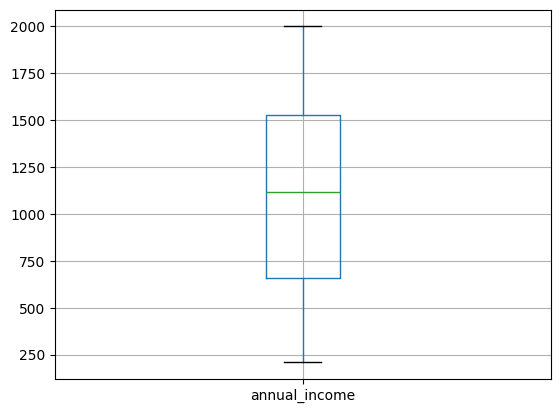

In [25]:
data.boxplot(column='annual_income')


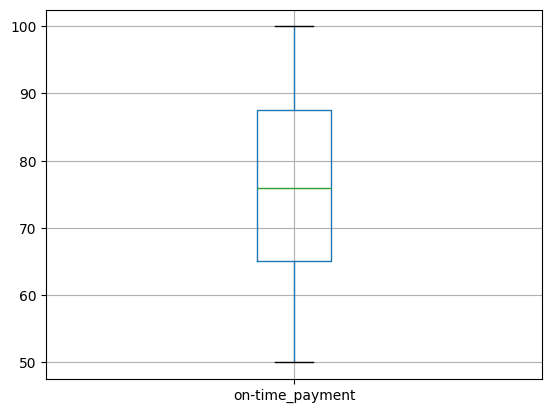

In [26]:
data.boxplot(column='on-time_payment')
plt.show()

In [27]:
Q1 = data['annual_income'].quantile(0.25)
Q3 = data['annual_income'].quantile(0.75)
IQR = Q3 - Q1


In [28]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [29]:
outliers = data[
    (data['annual_income'] < lower_bound) |
    (data['annual_income'] > upper_bound)
]

outliers


,respondent_id,age,annual_income,financial_responsibility,on-time_payment,credit_utilization,credit_score


In [30]:
outliers.shape[0]


0

there is no outlier in annoul_income colum

In [31]:
Q1 = data['financial_responsibility'].quantile(0.25)
Q3 = data['financial_responsibility'].quantile(0.75)
IQR=Q3-Q1


In [32]:
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)

In [33]:
outliers = data[
    (data['financial_responsibility'] < lower_bound) |
    (data['financial_responsibility'] > upper_bound)
]

outliers

,respondent_id,age,annual_income,financial_responsibility,on-time_payment,credit_utilization,credit_score


In [34]:
outliers.shape[0]

0

there is no outlier in financial_responsibility	

In [35]:
Q1=data['on-time_payment'].quantile(0.25)
Q3=data['on-time_payment'].quantile(0.75)
IQR=Q3-Q1

In [36]:
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)

In [37]:
outliers=data[(data['on-time_payment']<lower_bound)
               | (data['on-time_payment']>upper_bound)]
outliers

,respondent_id,age,annual_income,financial_responsibility,on-time_payment,credit_utilization,credit_score


In [38]:
Q1=data['credit_utilization'].quantile(0.25)
Q3=data['credit_utilization'].quantile(0.75)
IQR=Q3-Q1

In [39]:
lower_bound=Q1-(IQR*1.5)
upper_bound=Q3+(IQR*1.5)

In [40]:
outliers=data[(data['credit_utilization']<lower_bound)|
              (data['credit_utilization']>upper_bound)]
outliers

,respondent_id,age,annual_income,financial_responsibility,on-time_payment,credit_utilization,credit_score


In [41]:
Q1=data['credit_score'].quantile(0.25)
Q3=data['credit_score'].quantile(0.75)
IQR=Q3-Q1

In [42]:
lower_bound=Q1-(IQR*1.5)
upper_bound=Q3+(IQR*1.5)

In [43]:
outliers=data[(data['credit_score']<lower_bound)|
              (data['credit_score']>upper_bound)]
outliers

,respondent_id,age,annual_income,financial_responsibility,on-time_payment,credit_utilization,credit_score


In [44]:
data.describe()

,age,annual_income,financial_responsibility,on-time_payment,credit_utilization,credit_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,40.986000,1107.876550,5.455789,76.007389,48.64894,764.931000
std,13.497852,511.382348,2.735530,13.882070,28.27988,163.176257
min,18.000000,208.340000,1.000000,50.020000,0.02000,395.000000
25%,29.000000,656.112500,3.000000,65.055000,24.71750,634.000000
50%,42.000000,1118.140000,5.455789,76.007389,47.92500,768.000000
75%,52.000000,1527.537500,8.000000,87.500000,72.78250,889.000000
max,64.000000,1998.940000,10.000000,99.980000,99.76000,1136.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   respondent_id             1000 non-null   object 
 1   age                       1000 non-null   int64  
 2   annual_income             1000 non-null   float64
 3   financial_responsibility  1000 non-null   float64
 4   on-time_payment           1000 non-null   float64
 5   credit_utilization        1000 non-null   float64
 6   credit_score              1000 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [46]:
data = data.round(2)


In [47]:
data

,respondent_id,age,annual_income,financial_responsibility,on-time_payment,credit_utilization,credit_score
0,R1,56,780.24,6.0,68.11,50.16,646
1,R2,46,1657.77,2.0,86.29,9.86,921
2,R3,32,658.35,7.0,94.72,68.35,656
3,R4,60,1426.70,3.0,76.01,37.54,850
4,R5,25,1568.41,3.0,76.01,12.64,874
...,...,...,...,...,...,...,...
995,R996,22,978.50,6.0,95.78,33.06,789
996,R997,40,761.27,1.0,80.82,74.47,580
997,R998,27,1111.06,8.0,62.31,41.24,773
998,R999,61,991.12,7.0,84.53,19.58,816


In [48]:
data[data['credit_score']>850].count()

respondent_id               330
age                         330
annual_income               330
financial_responsibility    330
on-time_payment             330
credit_utilization          330
credit_score                330
dtype: int64

In [49]:
data['credit_score'].max()

np.int64(1136)

In [50]:
data

,respondent_id,age,annual_income,financial_responsibility,on-time_payment,credit_utilization,credit_score
0,R1,56,780.24,6.0,68.11,50.16,646
1,R2,46,1657.77,2.0,86.29,9.86,921
2,R3,32,658.35,7.0,94.72,68.35,656
3,R4,60,1426.70,3.0,76.01,37.54,850
4,R5,25,1568.41,3.0,76.01,12.64,874
...,...,...,...,...,...,...,...
995,R996,22,978.50,6.0,95.78,33.06,789
996,R997,40,761.27,1.0,80.82,74.47,580
997,R998,27,1111.06,8.0,62.31,41.24,773
998,R999,61,991.12,7.0,84.53,19.58,816


In [51]:
data['credit_score']=data['credit_score'].clip(lower=0,upper=850)

In [52]:
data['credit_score'].max()

np.int64(850)

In [53]:
data

,respondent_id,age,annual_income,financial_responsibility,on-time_payment,credit_utilization,credit_score
0,R1,56,780.24,6.0,68.11,50.16,646
1,R2,46,1657.77,2.0,86.29,9.86,850
2,R3,32,658.35,7.0,94.72,68.35,656
3,R4,60,1426.70,3.0,76.01,37.54,850
4,R5,25,1568.41,3.0,76.01,12.64,850
...,...,...,...,...,...,...,...
995,R996,22,978.50,6.0,95.78,33.06,789
996,R997,40,761.27,1.0,80.82,74.47,580
997,R998,27,1111.06,8.0,62.31,41.24,773
998,R999,61,991.12,7.0,84.53,19.58,816


In [54]:
mode_val = data['financial_responsibility'].mode()
mode_val


0    5.0
Name: financial_responsibility, dtype: float64

In [55]:
mean_val=data['financial_responsibility'].mean()
mean_val

np.float64(5.456)

In [56]:
import numpy as np
data.loc[
    data['financial_responsibility'].between(mean_val - 0.01, mean_val + 0.01),
    'financial_responsibility'
] = np.nan

In [57]:
data['financial_responsibility']

0      6.0
1      2.0
2      7.0
3      3.0
4      3.0
      ... 
995    6.0
996    1.0
997    8.0
998    7.0
999    9.0
Name: financial_responsibility, Length: 1000, dtype: float64

In [58]:
mode_val = data['financial_responsibility'].mode()[0]
data['financial_responsibility'] = data['financial_responsibility'].fillna(mode_val)


In [62]:
data = data.drop('respondent_id', axis=1)


In [64]:
data.to_csv(
    "/Users/tuhinalambijoy/Documents/Data_Science_Assignment/cleand_assignment_datads.csv",
    index=False
)

In [63]:
data

,age,annual_income,financial_responsibility,on-time_payment,credit_utilization,credit_score
0,56,780.24,6.0,68.11,50.16,646
1,46,1657.77,2.0,86.29,9.86,850
2,32,658.35,7.0,94.72,68.35,656
3,60,1426.70,3.0,76.01,37.54,850
4,25,1568.41,3.0,76.01,12.64,850
...,...,...,...,...,...,...
995,22,978.50,6.0,95.78,33.06,789
996,40,761.27,1.0,80.82,74.47,580
997,27,1111.06,8.0,62.31,41.24,773
998,61,991.12,7.0,84.53,19.58,816
